# WIP: Learning Curve Plot

_Paragraph here explaining the learning curve and its potential outcomes_

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(training_sizes, train_scores, test_scores, **kwargs):
    
    plot_labels = {
        'training_label': 'Training Score',
        'test_label': 'Test Score',
        'y_label': 'Score'
    }
    
    for key in kwargs:
        if key in plot_labels:
            plot_labels[key] = kwargs[key]
            
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(
    train_sizes,
    train_mean,
    color='blue',
    marker='o',
    markersize=5,
    label=plot_labels['training_label'],
    )
    plt.fill_between(
        train_sizes,
        train_mean + train_std,
        train_mean - train_std,
        alpha=0.15,
        color='blue',
    )
    plt.plot(
        train_sizes,
        test_mean,
        color='green',
        linestyle='--',
        marker='s',
        markersize=5,
        label=plot_labels['test_label'],
    )
    plt.fill_between(
        train_sizes,
        test_mean + test_std,
        test_mean - test_std,
        alpha=0.15,
        color='green',
    )
    plt.grid()
    plt.xlabel('Number of Training Examples')
    plt.ylabel(plot_labels['y_label'])
    plt.legend(loc='lower right')
    plt.show()

In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import (
    learning_curve,
    StratifiedKFold
)


iris = load_iris()
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
clf = RandomForestClassifier(max_depth=10, random_state=42)

In [3]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=clf,
    X=iris.data,
    y=iris.target,
    cv=cv,
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),
)

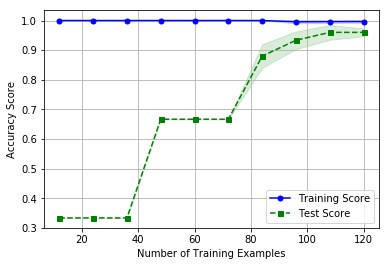

In [4]:
plot_learning_curve(train_sizes, train_scores, test_scores, y_label='Accuracy Score')